# Plot the decision surface of decision trees trained on the iris dataset


1. Plot the decision surface of a decision tree For each pair of features.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

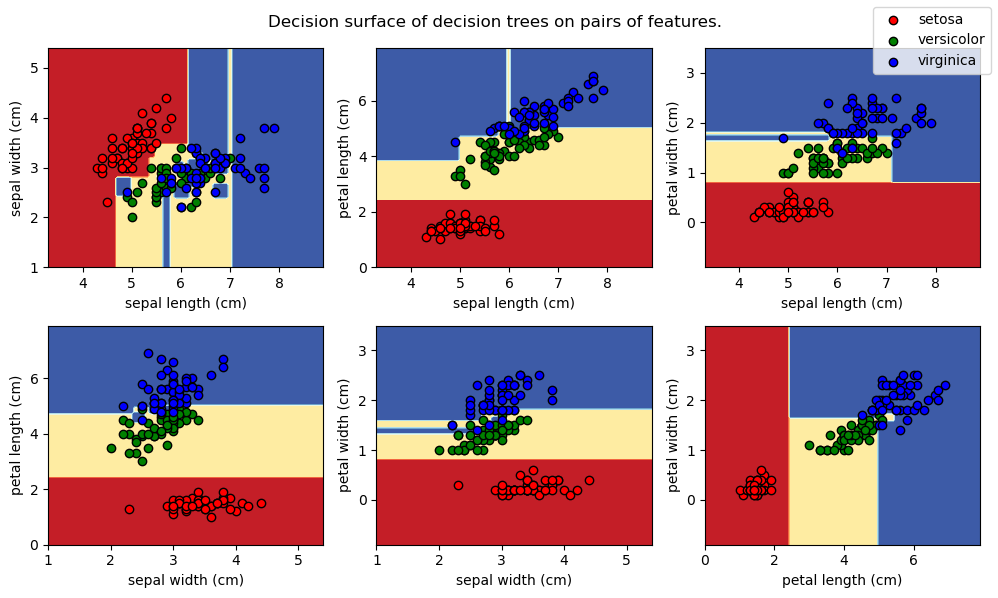

In [32]:
fig,axes =plt.subplots(2,3,figsize=(10,6))
axes = axes.ravel()
for i_ax, (pair,ax) in enumerate(zip([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]], axes)):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        cmap=plt.cm.RdYlBu,
        response_method='predict', # ❓
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]]
    )
    for i,c in zip(range(3), 'rgb'):
        idx = np.where(i==y)
        ax.scatter(
            X[idx,0],
            X[idx,1],
            c=c,
            label=iris.target_names[i] if i_ax == 0 else None,  # 只在第一个子图设置标签,
            edgecolor='black',
        )
fig.suptitle('Decision surface of decision trees on pairs of features.')
_= fig.legend()
fig.tight_layout()


2. Decision tree on all features.

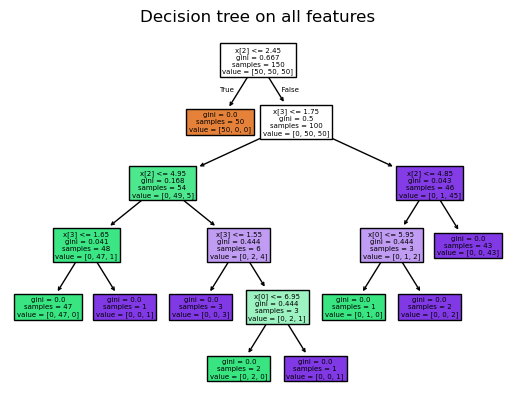

In [36]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
_ = plt.title('Decision tree on all features')